In [81]:
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
from shapely import ops
import matplotlib.pyplot as plt
from matplotlib import colors
from descartes import PolygonPatch

from tqdm import tqdm

import matplotlib.animation as animation

In [3]:
from particles.state import get_current_data

In [4]:
class Continent:
    def __init__(self, df, scale, buffer):
        polygons = []
        df = df[(df['time'] == 1) & (df['depth'] == 1)]
        for row in df.iterrows():
            if any([pd.isna(row[1]['uo']), pd.isna(row[1]['vo'])]):
                lon = row[1]['lon']
                lat = row[1]['lat']

                exterior = np.array([[lat - 1, lon - 1],
                                     [lat - 1, lon + 1],
                                     [lat + 1, lon + 1],
                                     [lat + 1, lon - 1]])
                
                exterior *= np.array(scale)
                poly = Polygon(exterior)
                polygons.append(poly)
        self.buffer = buffer
        self.continent = ops.unary_union(polygons)
        self.continent_buffer = self.continent.buffer(self.buffer)

    def buffer_contains(self, xy):
        """Point is near the coastline"""
        return self.continent_buffer.contains(Point(*xy))

    def contains(self, xy):
        return self.continent.contains(Point(*xy))

In [5]:
SCALE=4000
current_df = get_current_data('data.csv')

# Конвертируем в метры

min_lat, max_lat = current_df['lat'].min(), current_df['lat'].max()
min_lon, max_lon = current_df['lon'].min(), current_df['lon'].max()
max_depth = current_df['depth'].max()

current_df['x'] = (current_df['lat'] - min_lat) * SCALE
current_df['y'] = (current_df['lon'] - min_lon) * SCALE


In [10]:
continent = Continent(current_df, SCALE, 4000)

In [71]:
current_df

,time,depth,lat,lon,uo,vo,so,thetao,dens,x,y
0,1,1,1,1,NaN,NaN,NaN,NaN,NaN,0,0
1,1,1,2,1,NaN,NaN,NaN,NaN,NaN,4000,0
2,1,1,3,1,NaN,NaN,NaN,NaN,NaN,8000,0
3,1,1,4,1,NaN,NaN,NaN,NaN,NaN,12000,0
4,1,1,5,1,NaN,NaN,NaN,NaN,NaN,16000,0
...,...,...,...,...,...,...,...,...,...,...,...
3108555,10,56,57,91,NaN,NaN,NaN,NaN,NaN,224000,360000
3108556,10,56,58,91,NaN,NaN,NaN,NaN,NaN,228000,360000
3108557,10,56,59,91,NaN,NaN,NaN,NaN,NaN,232000,360000
3108558,10,56,60,91,NaN,NaN,NaN,NaN,NaN,236000,360000


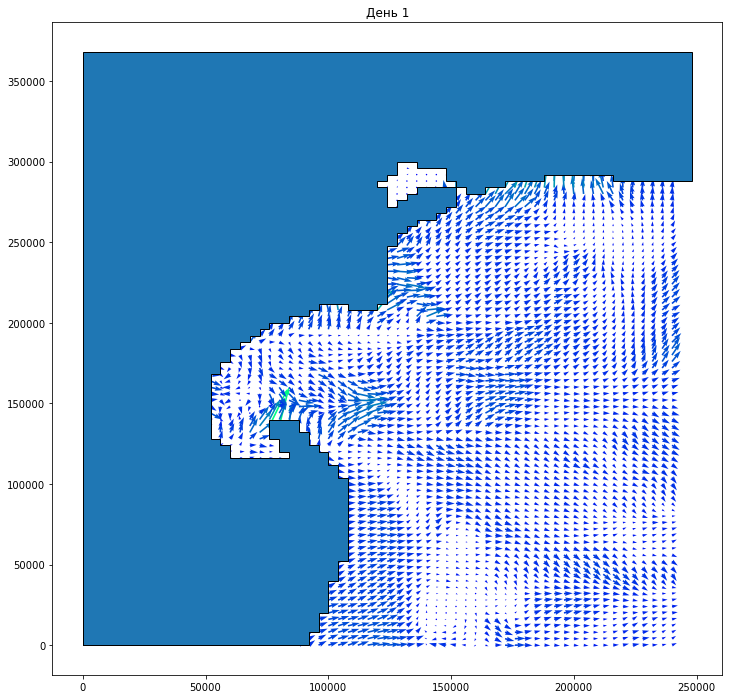

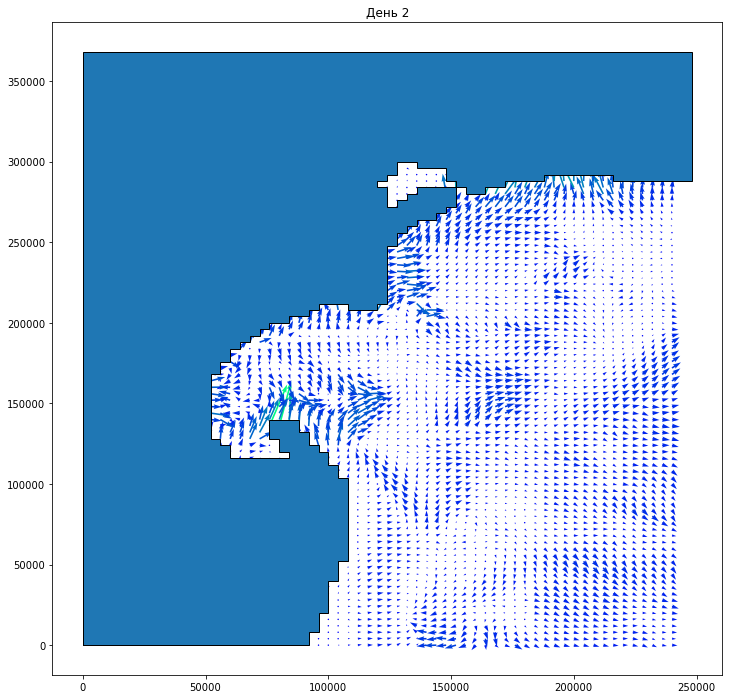

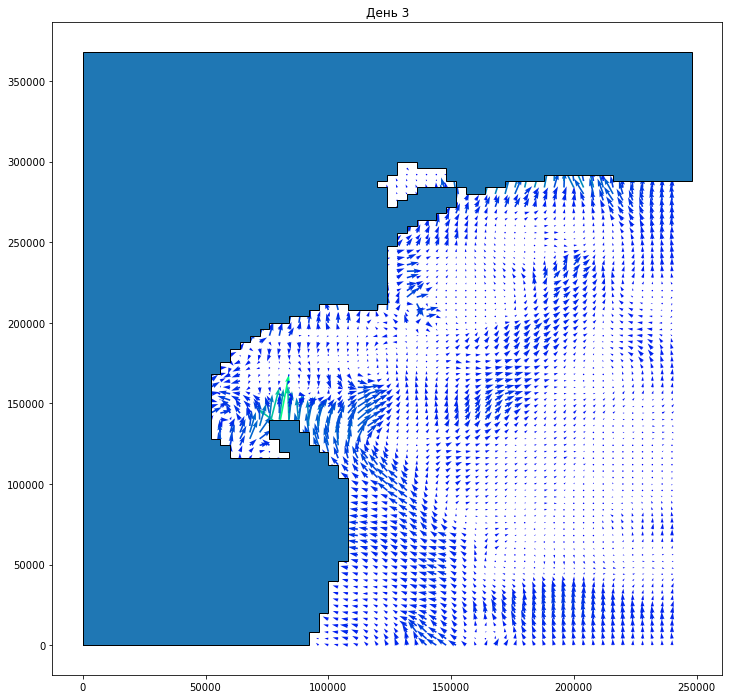

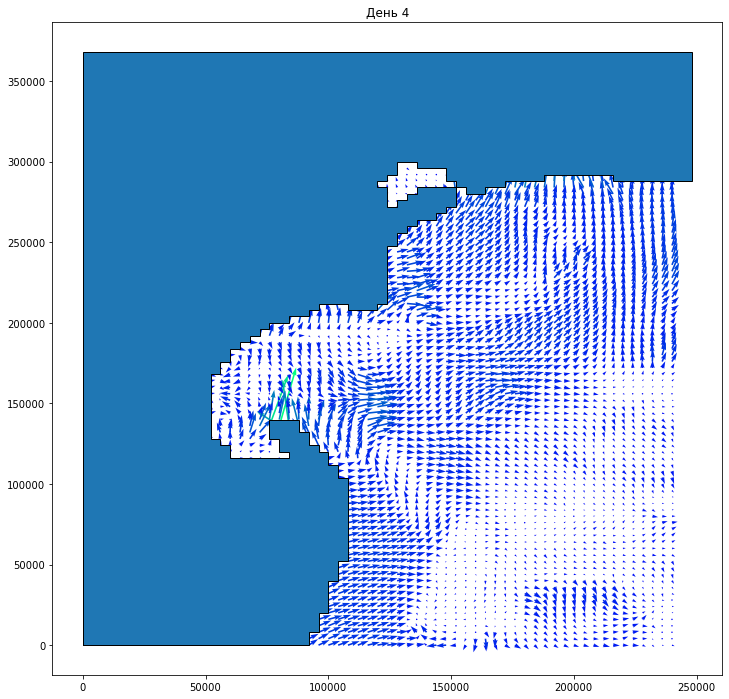

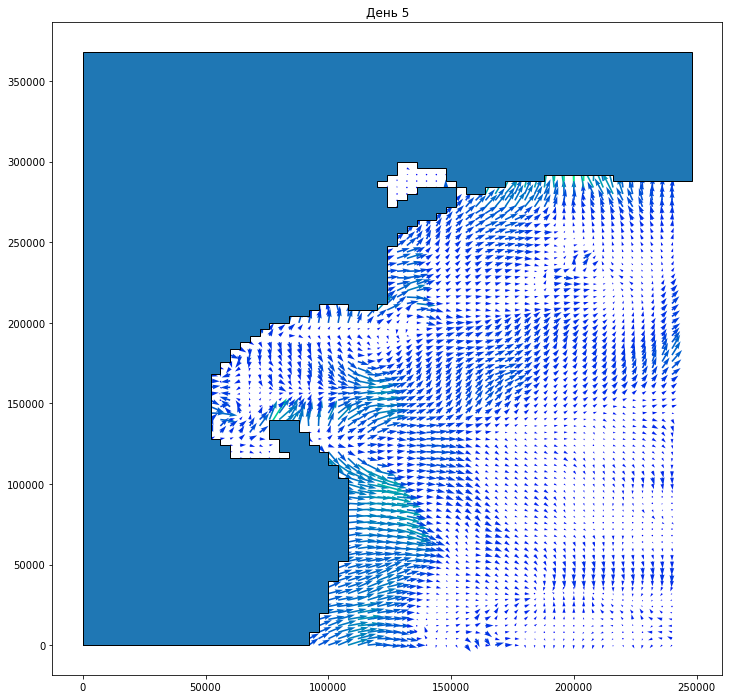

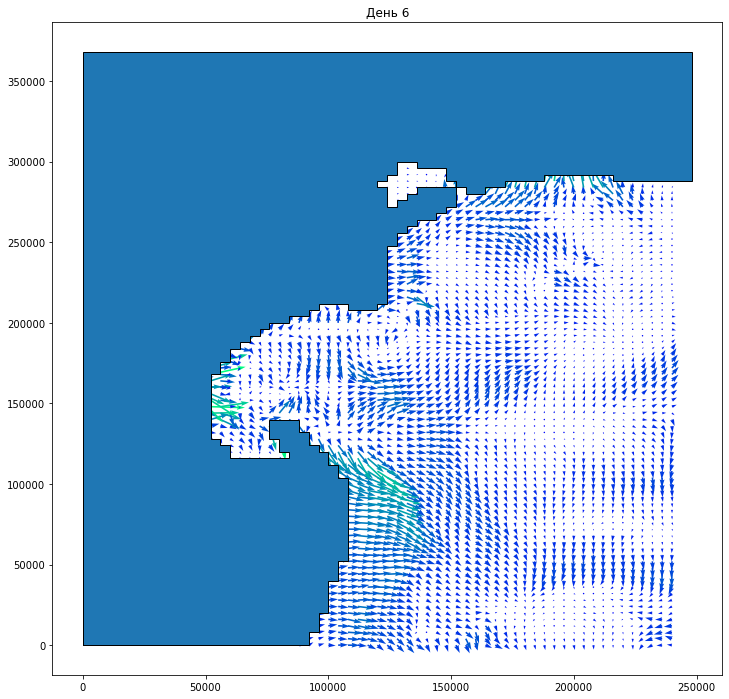

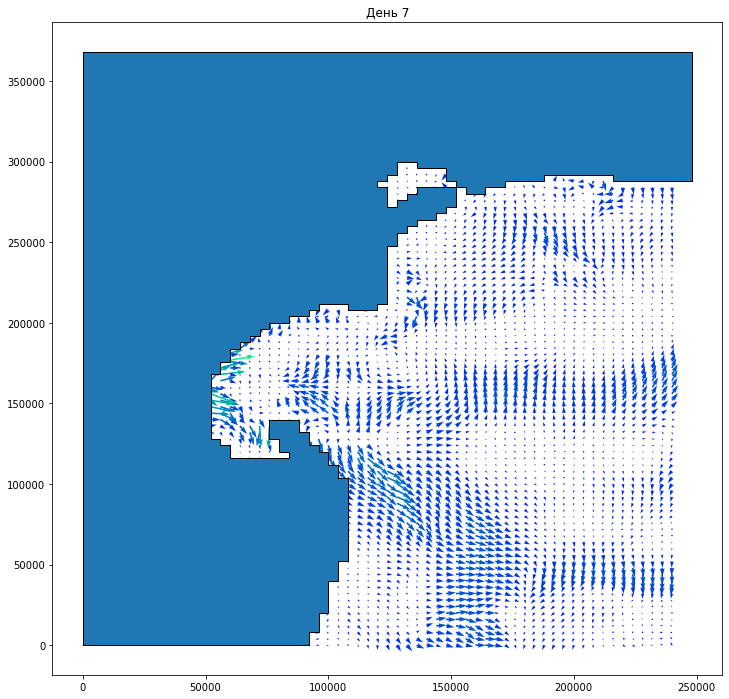

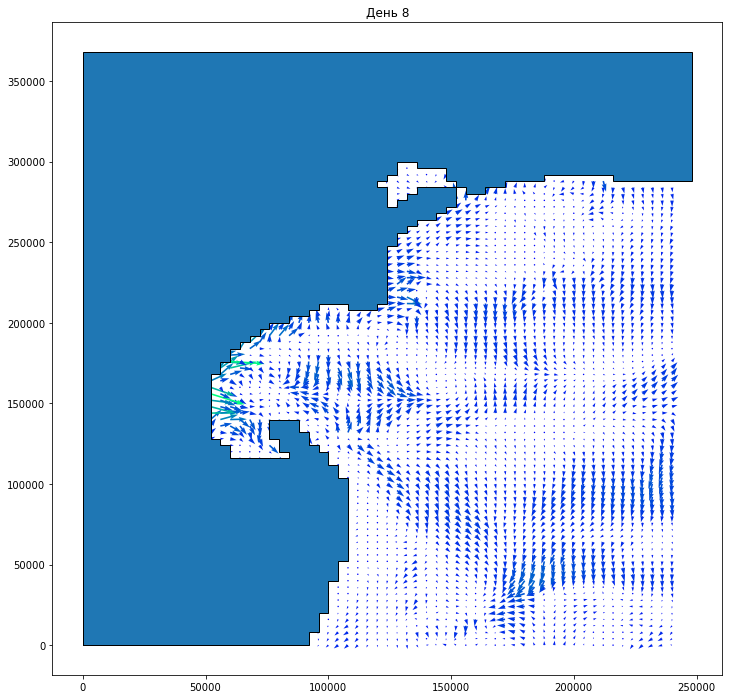

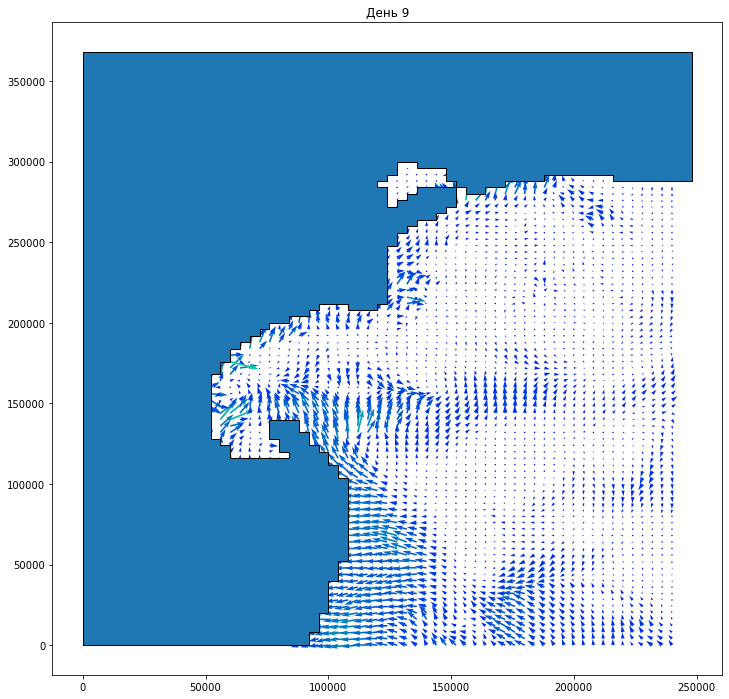

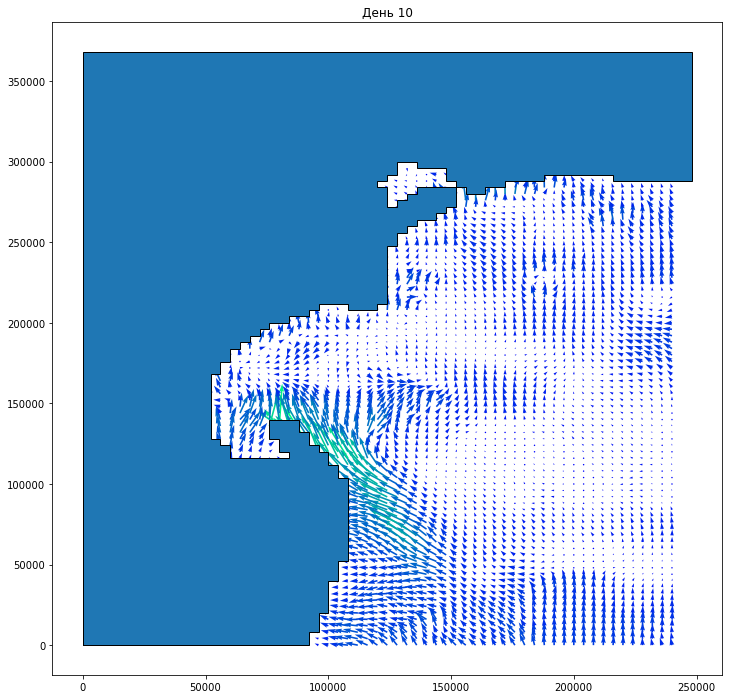

In [101]:
for i in range(10):
    fig, ax = plt.subplots(figsize=[12,12])
    ax.plot(0,0)
    ax.set_title(f'День {i+1}')
    ax.add_patch(PolygonPatch(continent.continent))

    df = current_df[(current_df['time'] == i+1) & (current_df['depth'] == 1)]
    current_velocity = np.sqrt(df.loc[:, 'uo'] ** 2 + df.loc[:, 'vo'] ** 2)
    q = ax.quiver(
        df.loc[:, 'x'],
        df.loc[:, 'y'],
        df.loc[:, 'uo'],
        df.loc[:, 'vo'],
        current_velocity,
        norm=colors.Normalize(vmin=0, vmax=current_velocity.max()),
        scale=7,
        scale_units='width',
        cmap='winter',
    )
    fig.savefig(f'current_{i+1}.png')
# def init():
#     return [q]
# def update(frame):
#     ax.set_title(f'День {frame+1}')
#     df = current_df[(current_df['time'] == frame+1) & (current_df['depth'] == 1)]
#     q.set_UVC(df['uo'], df['vo'], np.sqrt(df['uo'] ** 2 + df['vo'] ** 2))
#     return [q]
# ani = animation.FuncAnimation(
#     fig,
#     update,
#     frames=1,
#     init_func=init,
#     interval=200,
#     blit=True,
# )
# ani.save('current.mp4', writer=animation.FFMpegFileWriter())

In [54]:
current_velocity.max()

0.4319039332752425

In [4]:
for n,d in zip(np.random.randint(50, 150, 50) / 100, np.random.randint(20, 120, 50)/100):
    print(f'{n},{d}')

0.63,0.38
1.09,0.36
1.12,1.03
0.96,0.61
0.51,0.69
1.32,0.39
1.14,0.22
0.62,0.63
0.83,0.93
0.66,0.84
1.07,0.72
0.98,0.92
1.38,0.46
0.72,0.32
0.84,0.31
1.34,0.43
0.57,0.4
0.94,0.7
0.56,0.44
0.92,1.18
0.69,0.83
0.92,0.93
1.01,0.45
0.88,0.35
1.36,0.52
0.72,1.12
1.12,0.41
0.6,0.37
1.34,1.06
0.51,0.86
1.32,0.43
0.65,0.42
0.9,0.96
0.7,0.65
1.03,1.01
0.91,0.95
1.47,1.18
0.64,0.44
0.51,0.9
1.01,0.61
0.65,0.36
0.77,1.1
0.87,0.44
0.53,0.62
1.4,0.9
1.12,1.11
0.98,0.36
1.09,1.1
1.26,0.61
0.76,1.01
